Question 1:

In [1]:
import numpy as np

import pandas as pd

import scipy.stats as stats

# calculate sample mean before calculating t-score
daily_energy = {
    "energy_in_kj": [5260, 5470, 5640, 6180, 6390, 6515, 6805, 7515, 7515, 8230, 8770] 
}
de_df = pd.DataFrame(data=daily_energy)

# H0 there's no deviation
# H1 energy intake deviates systematically 

# recommended value
hypothesized_mean = 7725

alpha_level = 0.05

de_sample_mean =  de_df.mean()
# in this case the sample mean and population mean are the same
de_population_mean = de_sample_mean
de_std = de_df.std(ddof=1)
de_dof = (len(daily_energy["energy_in_kj"]))-1
de_sem = de_std / np.sqrt(len(daily_energy["energy_in_kj"]))

de_t_stat, de_p_value = stats.ttest_1samp(daily_energy["energy_in_kj"], hypothesized_mean)


print("Daily Energy intakes:", daily_energy["energy_in_kj"])
print("P-value:", de_p_value)
print("T-statistic:", de_t_stat)
print("Standard error of mean:", de_sem.values[0])
print("Degree of freedom:", de_dof)
print("Population Mean:", de_population_mean.values[0])
print("Sample Mean:", de_sample_mean.values[0])
print("Sample Standard Deviation:", de_std.values[0])
print("Null Hypothesis Rejection status:", (de_p_value < alpha_level))

Daily Energy intakes: [5260, 5470, 5640, 6180, 6390, 6515, 6805, 7515, 7515, 8230, 8770]
P-value: 0.018137235176105812
T-statistic: -2.8207540608310193
Standard error of mean: 344.3631083801271
Degree of freedom: 10
Population Mean: 6753.636363636364
Sample Mean: 6753.636363636364
Sample Standard Deviation: 1142.1232221373727
Null Hypothesis Rejection status: True


Question 2:

In [2]:
# to utilize sqrt function
import numpy as np
# to utilize dataframe function 
import pandas as pd
import scipy.stats as stats

goes_data = {
    "Location": ["Ireland","Elsewhere"],
    "Sample Size": [42,61],
    "Mean": [61,57],
    "Standard Deviation": [7.4,7.1]
}



goes_df = pd.DataFrame(data=goes_data)
# H0 goes score is the same elsewhere  
# H1 goes score is highest in ireland or not equal to other countries
# valid test would be a two sample test 
# since no values for the individual goes scores are provided, a welch's t-test formula is appropriate 

alpha_level = 0.05

# using the two sample test since we are comparing means from two groups

# in order to calculate the t-test, get the Standard error of mean for both groups
i_std_d = goes_data["Standard Deviation"][0]
i_ss = goes_data["Sample Size"][0]
i_mean = goes_data["Mean"][0]
e_std_d = goes_data["Standard Deviation"][1]
e_ss = goes_data["Sample Size"][1]
e_mean = goes_data["Mean"][1]

i_sem= i_std_d / np.sqrt(i_ss)
e_sem= e_std_d / np.sqrt(e_ss)

# using welch's formula 
goes_t_statistic = (i_mean - e_mean) / np.sqrt((i_std_d**2/i_ss) + (e_std_d**2/e_ss))

print("T-statistic:", goes_t_statistic)

dof = ((i_std_d**2/i_ss) +(e_std_d**2/e_ss))**2 / (((i_std_d**2/i_ss)**2) /(i_ss-1) + ((e_std_d**2/e_ss)**2) /(e_ss-1))

print("Degree of Freedom:", dof)

goes_p_value = stats.t.sf(np.abs(goes_t_statistic), dof) * 2

print("P-value:", goes_p_value)



T-statistic: 2.740624266192897
Degree of Freedom: 85.87168862441837
P-value: 0.007458859037688364


Question 3:

     index Country Code       Year     Fertility      GDP
0    14098          ABW 2013-01-01  36877.014132  2.11700
1    14099          AFE 2013-01-01   3337.142219  4.80882
2    14100          AFG 2013-01-01   2138.753060  5.69600
3    14101          AFW 2013-01-01   3971.199770  5.50635
4    14102          AGO 2013-01-01   7566.423051  5.95300
..     ...          ...        ...           ...      ...
261  14359          XKX 2013-01-01   8090.768293  2.09800
262  14360          YEM 2013-01-01   3437.429536  4.52900
263  14361          ZAF 2013-01-01  13569.252848  2.42800
264  14362          ZMB 2013-01-01   3514.718488  5.02600
265  14363          ZWE 2013-01-01   2558.994062  4.06400

[266 rows x 5 columns]


C:\Users\Mark Ahugari\AppData\Local\Temp\ipykernel_8312\2618265848.py:38: UserWarning: The figure layout has changed to tight
  plt.tight_layout(pad=2.0)


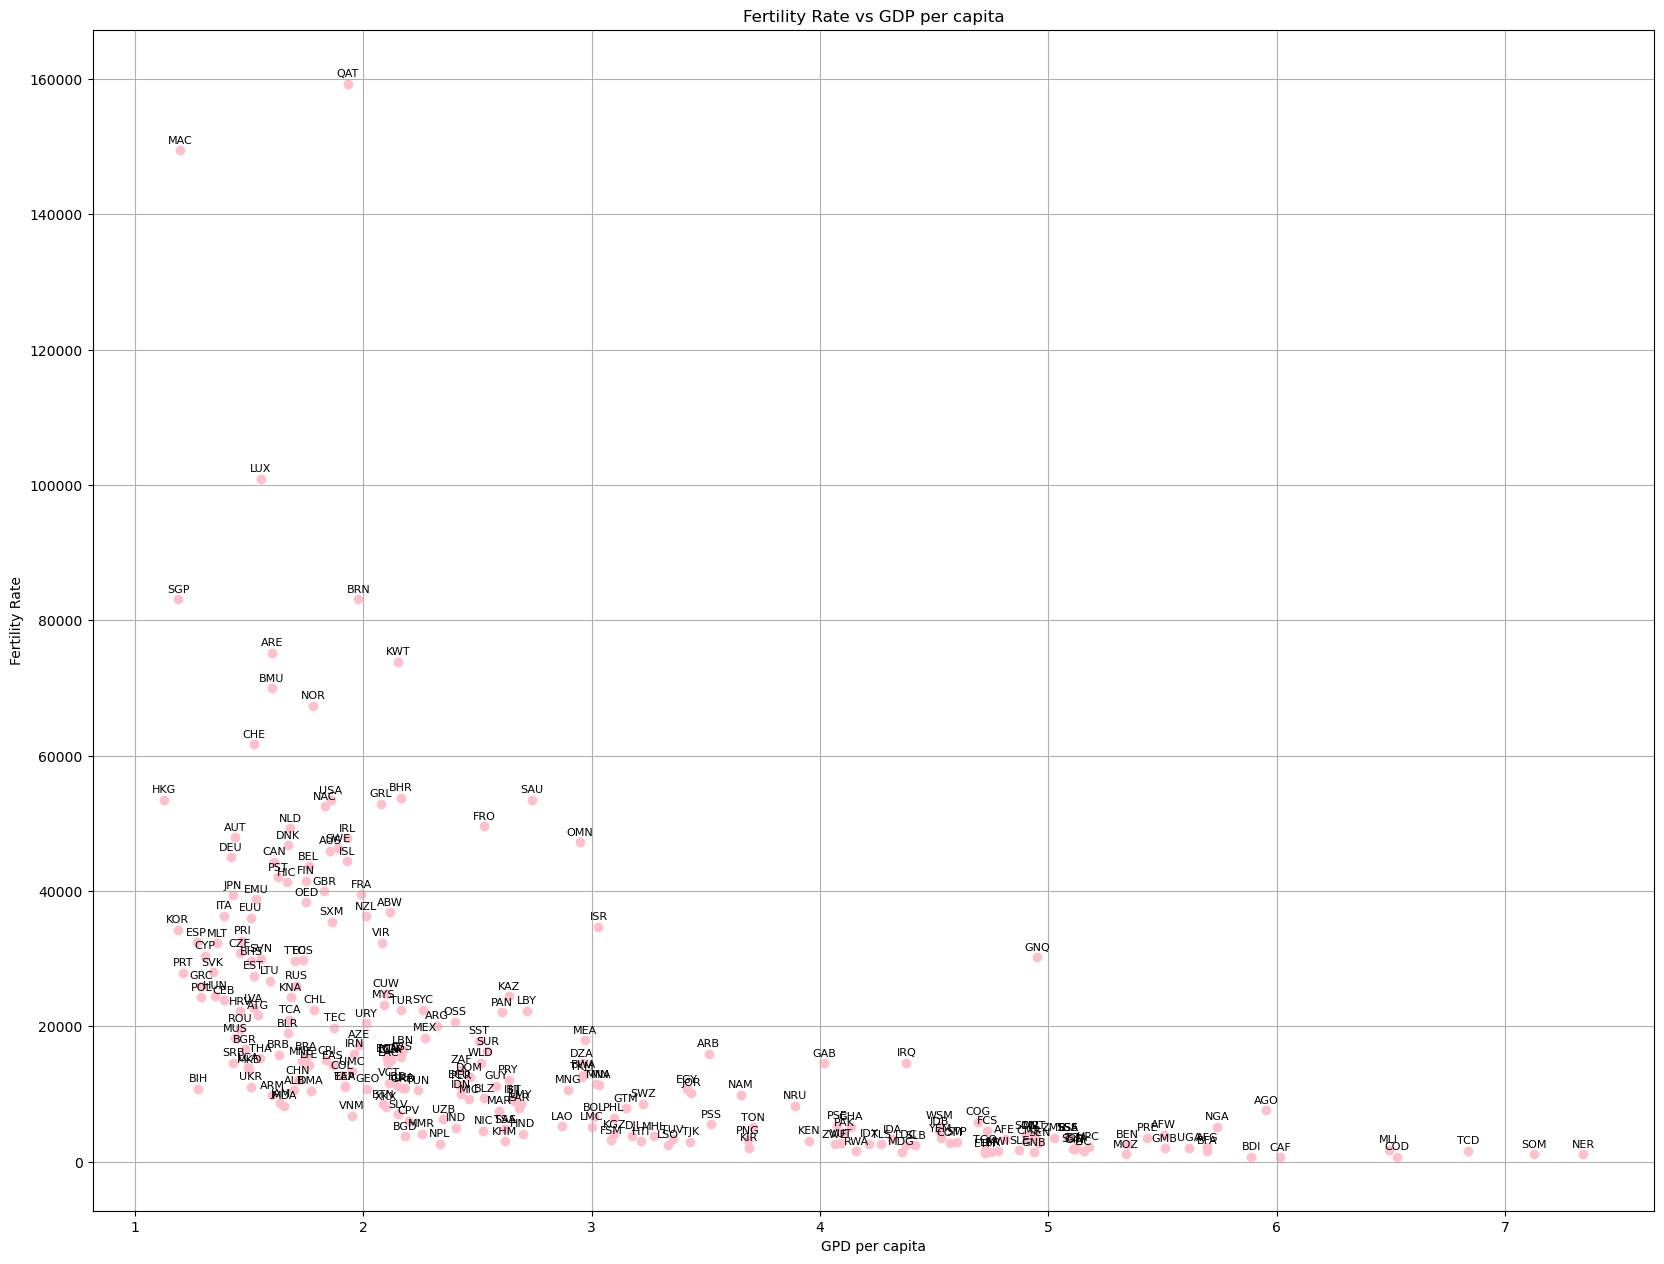

In [114]:
# to utilize the read_excel function
import pandas as pd
# to utilize the tabulate formatter for tables
from tabulate import tabulate as tb
# to utilize the plt function
import matplotlib.pyplot as plt

fertility_rate_df = pd.read_excel('data/fertility_rate.xls', sheet_name="Data", skiprows=3)
gdp_per_capita = pd.read_excel('data/gdp_per_capita.xls', sheet_name="Data", skiprows=3)

fertility_rate_df_filtered = fertility_rate_df.drop(columns=['Indicator Name', 'Country Name', 'Indicator Code'])
gdp_per_capita_df_filtered = gdp_per_capita.drop(columns=['Indicator Name', 'Country Name', 'Indicator Code'])

fertility_rate_df_melted = fertility_rate_df_filtered.melt(id_vars='Country Code', var_name='Year', value_name='Fertility')
gdp_per_capita_melted = gdp_per_capita_df_filtered.melt(id_vars='Country Code', var_name='Year', value_name='GDP')
# print(gdp_per_capita_melted)

fertility_gdp_df = pd.merge(fertility_rate_df_melted, gdp_per_capita_melted, on=['Year', 'Country Code'])

fertility_gdp_converted = fertility_gdp_df
fertility_gdp_converted['Year'] = pd.to_datetime(fertility_gdp_df['Year'], format='%Y')
fertility_gdp_df_2013 = fertility_gdp_converted[fertility_gdp_converted['Year'].dt.year == 2013]
fertility_gdp_df_2013.reset_index(inplace=True)

plt.figure(figsize=(17,13), constrained_layout=True)
plt.scatter(fertility_gdp_df_2013['GDP'], fertility_gdp_df_2013['Fertility'], color='pink')
plt.title("Fertility Rate vs GDP per capita")
plt.xlabel('GPD per capita')
plt.ylabel('Fertility Rate')

print(fertility_gdp_df_2013)
# print(fertility_gdp_df_2013['GDP'])

for i in range(len(fertility_gdp_df_2013)):
    plt.annotate(fertility_gdp_df_2013['Country Code'][i], (fertility_gdp_df_2013['GDP'][i], fertility_gdp_df_2013['Fertility'][i]), textcoords="offset points", xytext=(0,5), ha="center", fontsize=8)
    
plt.grid(True)
plt.tight_layout(pad=2.0)
plt.show()




Question 4:

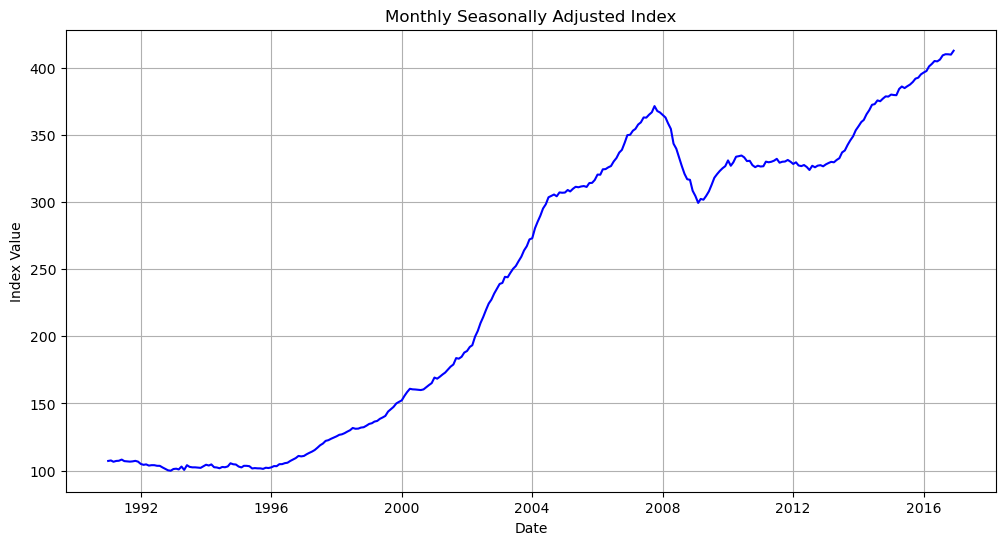

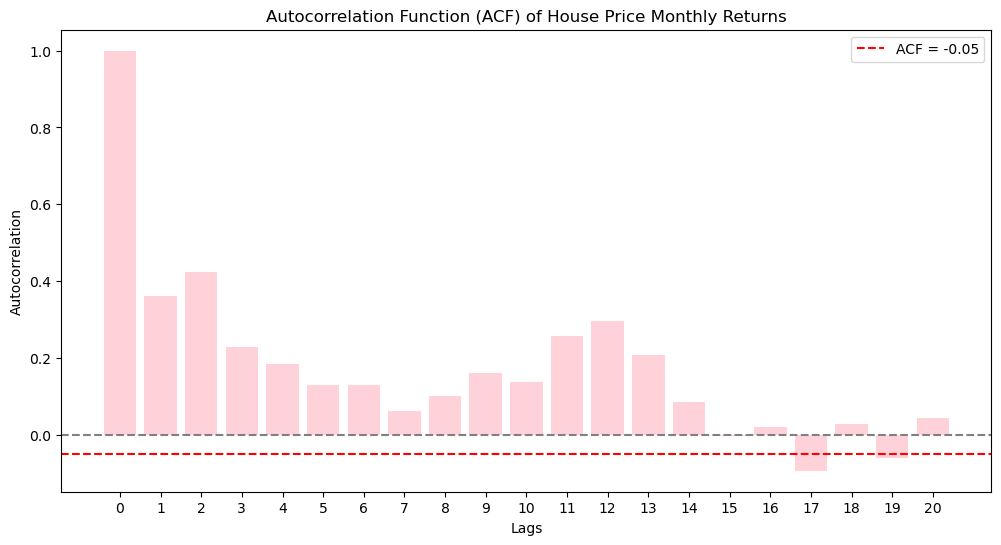

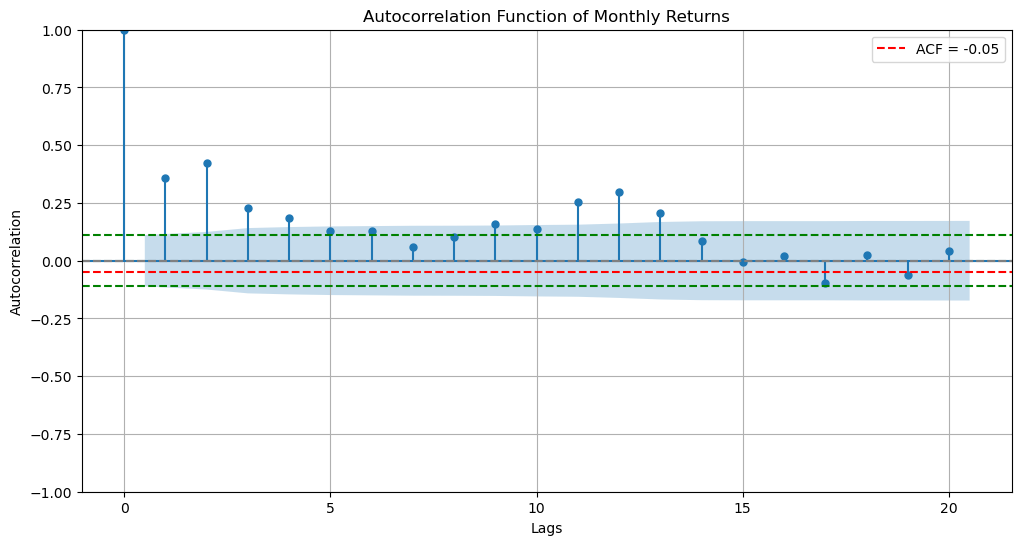

Annualized Return (as a percentage): 5.453020256940899% 


In [30]:
# to utilize the read_excel function
import pandas as pd
# to utilize the arange function
import numpy as np
# to configure and plot graphs
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import acf

# save data from file into dataframe
house_price_df = pd.read_excel('data/Monthly Average House Price.xls', sheet_name='Monthly')
house_price_df.set_index('Unnamed: 0', inplace=True)
# filter the dataframe to data up to 2016
house_price_df = house_price_df.loc[:'2016-12-31']

# configure and plot graph
plt.figure(figsize=(12,6))
plt.plot(house_price_df.index, house_price_df['Seasonally Adjusted Index'],color='blue')
plt.title("Monthly Seasonally Adjusted Index")
plt.xlabel("Date")
plt.ylabel("Index Value")
plt.grid()

# calculate average monthly return
house_price_df['Monthly Return'] = house_price_df['Average House Price'].pct_change()
clean_returns = house_price_df['Monthly Return'].dropna().values

# calculate the annualized return (as a %age)
avg_monthly_return = clean_returns.mean()
annualized_ret = (1+avg_monthly_return) ** 12-1
annualized_ret_percentage = annualized_ret * 100

house_acf = acf(house_price_df['Monthly Return'].dropna(), nlags=20)


# configure and plot graph
plt.figure(figsize=(12,6))
plt.bar(range(len(house_acf)), house_acf, color='pink', alpha=0.7)
plt.axhline(y=0, color='gray', linestyle='--')
plt.axhline(y=-0.05, color='red', linestyle='--', label='ACF = -0.05')
plt.title("Autocorrelation Function (ACF) of House Price Monthly Returns")
plt.xlabel('Lags')
plt.ylabel('Autocorrelation')
plt.xticks(range(len(house_acf)))
plt.legend()
plt.show()


print(f"Annualized Return (as a percentage): {annualized_ret_percentage}% ")


Question 5:

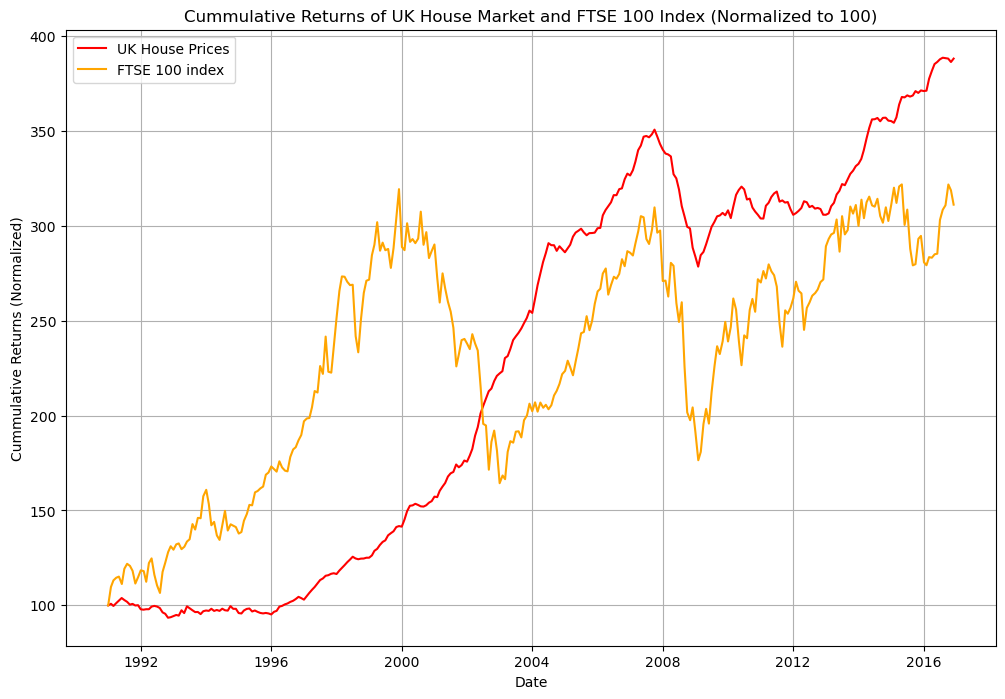

1.0
3.1115190745682937
Annualized Return: 4.645100329517793


C:\Users\Mark Ahugari\AppData\Local\Temp\ipykernel_14368\11894570.py:58: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(ftse_df.tail(1)['Cummulative Return'][0])


In [11]:
# to utilize the read_excel function
import pandas as pd
# to utilize the arange function
import numpy as np
# to configure and plot graphs
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf

# save data from file into dataframe
house_df = pd.read_excel('data/Monthly Average House Price.xls', sheet_name='Monthly')
house_df['Date'] = pd.to_datetime(house_df['Unnamed: 0'])
house_df.set_index('Unnamed: 0', inplace=True)

ftse_df = pd.read_csv('data/FTSE100.csv')
ftse_df['Date'] = pd.to_datetime(ftse_df['Date'])
ftse_df.set_index('Date', inplace=True)

house_df.sort_index(inplace=True)
ftse_df.sort_index(inplace=True)


house_df['Monthly Return'] = house_df['Average House Price'].pct_change()
house_df['Cummulative Return'] = (1 + house_df['Monthly Return']).cumprod()

# ftse_df['Monthly Return'] = ftse_df['Close']
# ftse_df['Monthly Return'] = ftse_df['Close'].pct_change()
ftse_df['Monthly Return'] = ftse_df['Close'].pct_change()
# ftse_df['Cummulative Return'] = ftse_df['Monthly Return']
ftse_df['Cummulative Return'] = (1 + ftse_df['Monthly Return']).cumprod()


# filling the first month value with 1 (100) for normalization purposes
house_df['Cummulative Return'] = house_df['Cummulative Return'].fillna(1)
ftse_df['Cummulative Return'] = ftse_df['Cummulative Return'].fillna(1)

# filter the values up to 2016
house_df = house_df.loc[:'2016-12-31']
ftse_df = ftse_df.loc[:'2016-12-31']

# ensuring the start year is 1991 before normalization
start_day = '1991-01-01'
house_cum_normalized = house_df.loc[start_day:]['Cummulative Return'] * 100/house_df.loc[start_day]['Cummulative Return']
ftse_cum_normalized = ftse_df.loc[start_day:]['Cummulative Return'] * 100 / ftse_df.loc[start_day]['Cummulative Return']

# configure and plot graph
plt.figure(figsize=(12,8))
plt.plot(house_cum_normalized.index, house_cum_normalized, label='UK House Prices', color='red')
plt.plot(ftse_cum_normalized.index, ftse_cum_normalized, label='FTSE 100 index', color='orange')
plt.title("Cummulative Returns of UK House Market and FTSE 100 Index (Normalized to 100)")
plt.xlabel("Date")
plt.ylabel("Cummulative Returns (Normalized)")
plt.grid()
plt.legend()
plt.show()

# finding the annualized return for the period 1991-2016
# print(ftse_df.loc[start_day]['Cummulative Return'])
# print(ftse_df.tail(1)['Cummulative Return'][0])
start_value = ftse_df.loc[start_day]['Cummulative Return']
end_value = ftse_df.values[-1][-1]
total_return = (end_value- start_value)/start_value
years = 2016-1991

annualized_return = 100 * ((1 + total_return)**(1/years)-1)

print("Annualized Return:", annualized_return)
